# Key insights

- A total of 5377 films were collected
    - 99 minutes being the average running time
- The United States is the country that has produced the most films over time, followed by India
- Drama is the Genre with the most films produced in the period analyzed

***
# Imports and Load data

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Upload csv
netflix_df=pd.read_csv('netflix_data.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [3]:
# Filtreing
netflix_subset=netflix_df[netflix_df.type=='Movie']
netflix_subset.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


In [4]:
netflix_movies=netflix_subset[["title", "country", "genre", "release_year", "duration"]]
netflix_movies.head(10)

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95
7,187,United States,Dramas,1997,119
8,706,India,Horror Movies,2019,118
9,1920,India,Horror Movies,2008,143
10,1922,United States,Dramas,2017,103
13,"2,215",Thailand,Documentaries,2018,89


In [5]:
# short_movies
short_movies=netflix_movies[netflix_movies.duration<60]
short_movies.head()

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28


In [6]:
short_movies.genre.unique()

array(['Documentaries', 'Uncategorized', 'Children', 'Stand-Up',
       'Comedies', 'Dramas', 'International Movies', 'Action', 'Music',
       'Classic Movies', 'Anime Features', 'Horror Movies'], dtype=object)

*** 
# Plot Analysis

In [7]:
# Set colors
colors=[]
for index, row in netflix_movies.iterrows():
    if row['genre'] == 'Children':
        colors.append('green')
    elif row['genre'] == 'Documentaries':
        colors.append('blue')
    elif row['genre'] == 'Stand-Up':
        colors.append('yellow')
    else:
        colors.append('red')

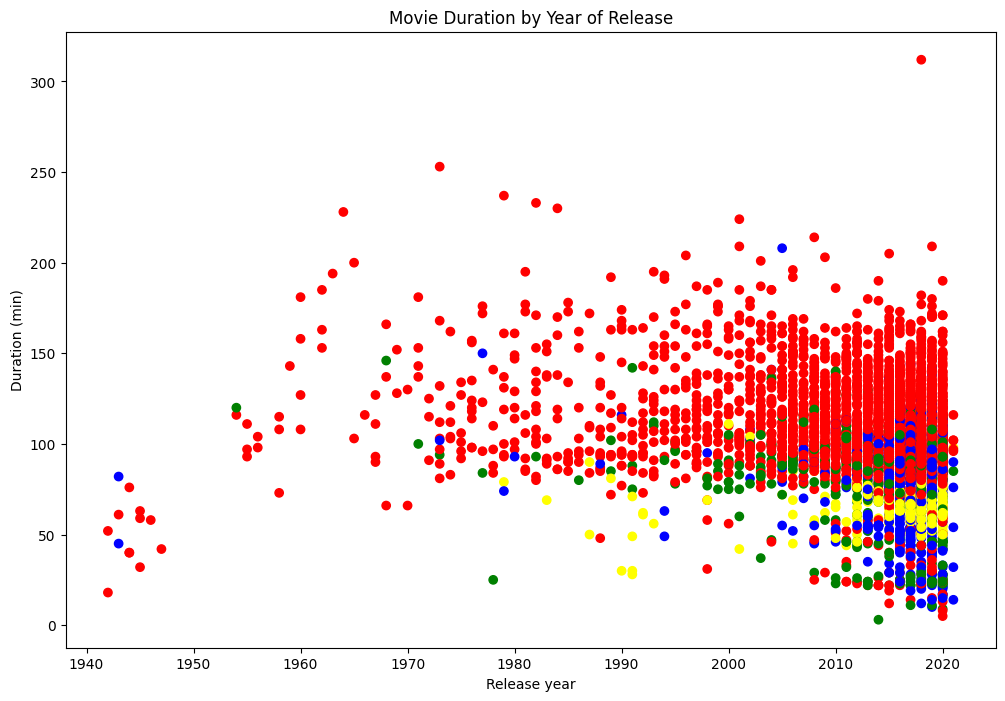

In [8]:
# Gen plot
fig = plt.figure(figsize=(12,8))

plt.scatter(netflix_movies['release_year'], netflix_movies['duration'], color=colors)
plt.title("Movie Duration by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.show()

In [9]:
answer = "maybe"

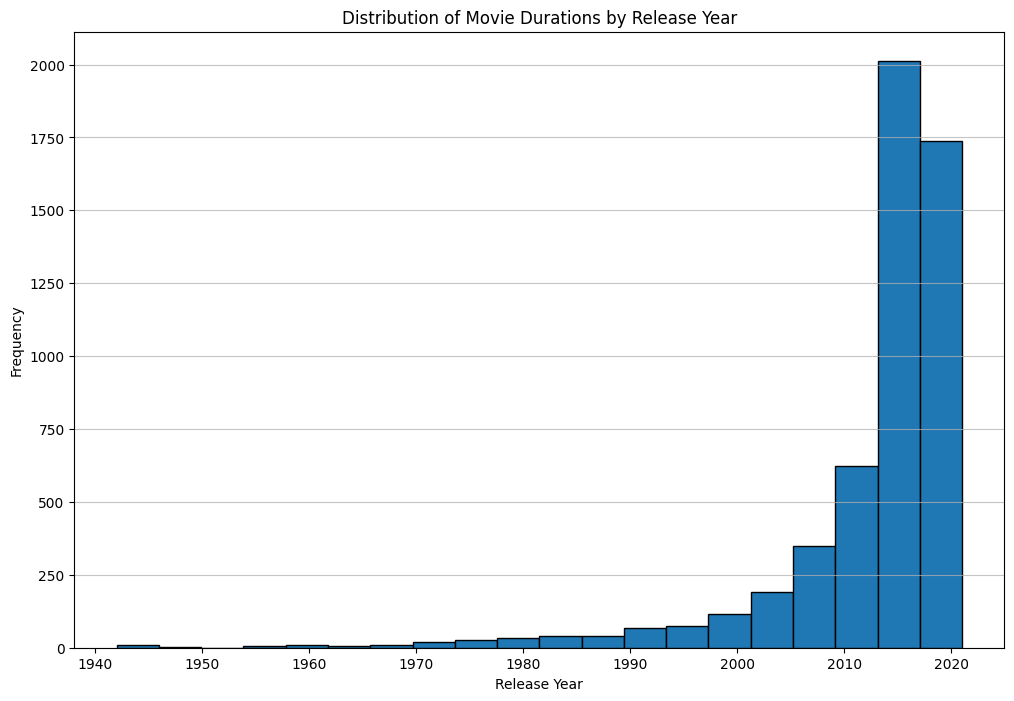

In [14]:
# Films released over the years
fig = plt.figure(figsize=(12, 8))

plt.hist(netflix_movies['release_year'], bins=20, edgecolor='black')
plt.title("Distribution of Movie Durations by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)

plt.show()

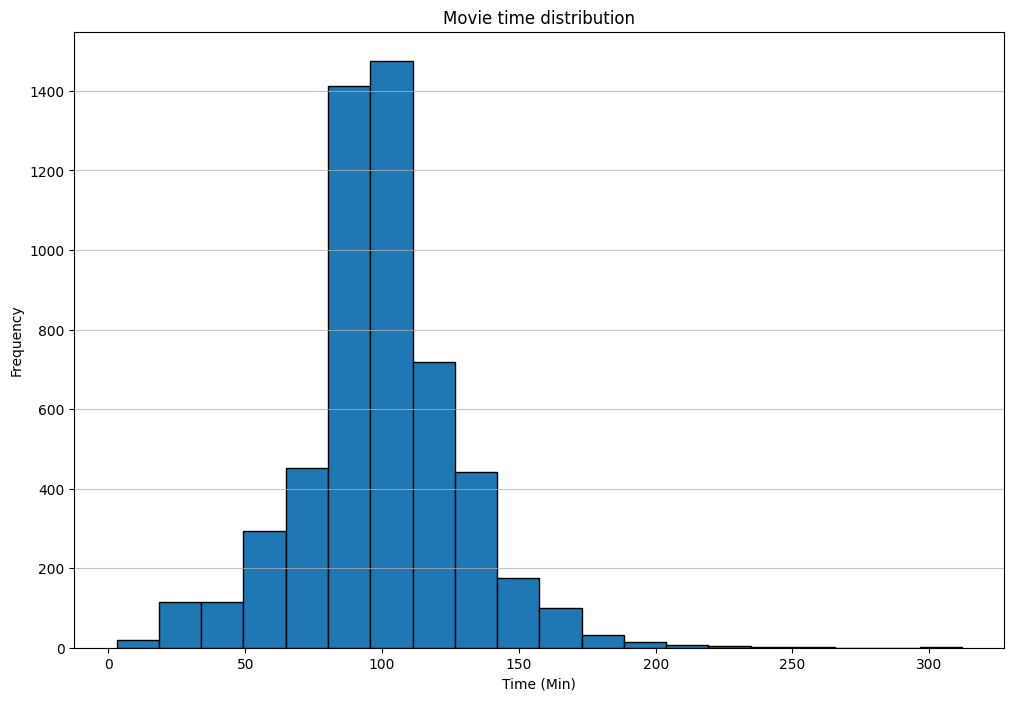

In [17]:
# Movie time distribution
fig = plt.figure(figsize=(12, 8))

plt.hist(netflix_movies['duration'], bins=20, edgecolor='black')
plt.title("Movie time distribution")
plt.xlabel("Time (Min)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)

plt.show()

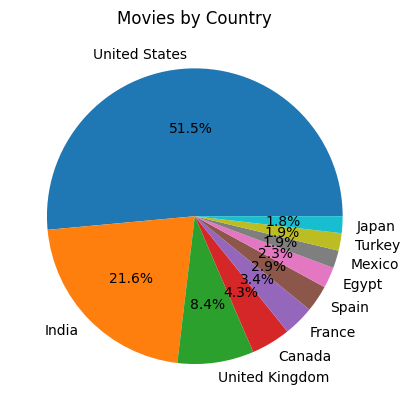

In [44]:
# Top 10 countries that made the most movies
fig, ax = plt.subplots()

netflix_movies['country'].value_counts()[:10]

countries=netflix_movies['country'].value_counts().sort_values(ascending=False)

countries[:10].plot.pie(autopct='%1.1f%%')

plt.title("Movies by Country")
plt.ylabel('')
plt.show()


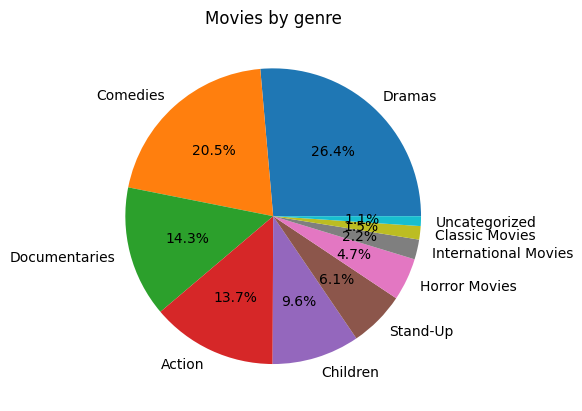

In [45]:
# Top 10 countries that made the most movies
fig, ax = plt.subplots()

netflix_movies['genre'].value_counts()[:10]

countries=netflix_movies['genre'].value_counts().sort_values(ascending=False)

countries[:10].plot.pie(autopct='%1.1f%%')

plt.title("Movies by genre")
plt.ylabel('')
plt.show()
